data length 300


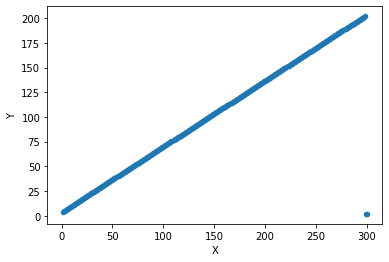

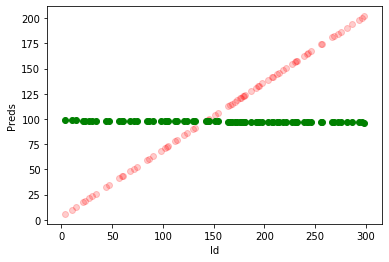

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



class SimpleRegression:
    def __init__(self):
        self.slope = 0
        self.intercept = 0
    def fit(self,x,y):
        self.x = x
        self.y = y
        numerator = np.sum((self.x - np.mean(self.x)*(self.y - np.mean(self.y))))
        denominator = np.sum((self.x - np.mean(self.x) **2))
        self.slope = numerator/denominator
        self.intercept = np.mean(self.y) - (self.slope* np.mean(self.x))
    def predict(self,x):
        return (self.slope* x) + self.intercept
    def evalute(self, X ,Y):
        return np.mean((Y - (self.predict(X))) ** 2)
    def plot(self, x, y):
        ypreds = self.predict(x)
        plt.scatter(x, y, color='red', alpha=0.2)
        plt.scatter(x, ypreds, color='green')

dataset = pd.read_csv("data.csv")
print("data length",len(dataset))
xAxisarray = np.array(dataset.X)
yAxisarray = np.array(dataset.Y)

from sklearn.model_selection import train_test_split as trainer
trainsetXwithValidation,TestSetX,TrainSetYwithValidation,TestSetY = trainer(xAxisarray, yAxisarray)
trainsetX , validx, trainsetY , validY = trainer(trainsetXwithValidation,TrainSetYwithValidation)

output = pd.read_csv("output.csv")

dataset.plot(kind="scatter",x = "X", y = "Y")
output.plot(kind="scatter",x = "Id",y="Preds")


x = SimpleRegression()
x.fit(trainsetX , trainsetY)
x.plot(TestSetX,TestSetY)